In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Data/hawaii.sqlite")
inspect = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
print(inspect.get_table_names())

['measurement', 'station']


In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2015,05,05', '2016,05,05'))

[(56.0, 73.8603305785124, 86.0)]


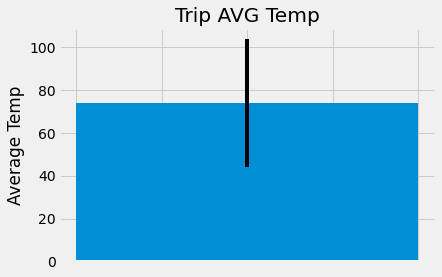

In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = calc_temps('2015,05,05', '2016,05,05')[0][0]
avg_temp = calc_temps('2015,05,05', '2016,05,05')[0][1]
max_temp = calc_temps('2015,05,05', '2016,05,05')[0][2]
plt.bar(x = 1, height = avg_temp, yerr = max_temp - min_temp )
plt.tick_params(axis='x', labelbottom=False)
plt.ylabel('Average Temp')
plt.title('Trip AVG Temp');

### Daily Rainfall Average

In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def average_rain(start_date, end_date):
    return session.query(measurement.station, func.sum(measurement.prcp)).\
        filter(measurement.date >= start_date, measurement.date <=end_date).\
        group_by(measurement.station).\
        order_by(func.sum(measurement.prcp).desc()).all()

average_rain('2015-0-05', '2016-05-05')

[('USC00516128', 190.29000000000008),
 ('USC00519281', 100.65999999999998),
 ('USC00513117', 65.49000000000002),
 ('USC00519523', 62.04999999999998),
 ('USC00514830', 49.05999999999999),
 ('USC00519397', 20.330000000000002),
 ('USC00511918', 6.090000000000001),
 ('USC00517948', 3.6600000000000006),
 ('USC00518838', 0.0)]

In [53]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [59]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
datelist = pd.date_range(dt(start_date), periods=6).tolist()

# Use the start and end date to create a range of dates
def daily_norms(date):
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date, measurement.date<=end_date).all()
print(daily_norms(f'{start_date}',f'{end_date}'))
# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


TypeError: 'module' object is not callable

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session